In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

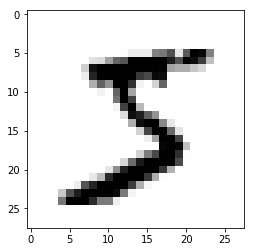

In [8]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
print(x_train[0])
plt.imshow(x_train[0],cmap = plt.cm.binary)

In [13]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))
model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2642 - acc: 0.92311s - loss: 0.34 - ETA: 0s - loss: 0.2
Epoch 2/3
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1077 - acc: 0.9664
Epoch 3/3
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0727 - acc: 0.9773


In [15]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss , val_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0927 - acc: 0.9735
0.09274412567354738 0.9735


In [18]:
model.save('epic_num_reader.model')


In [19]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [21]:
predictions = new_model.predict(x_test)

In [22]:
print(predictions)

[[6.47661647e-11 1.03701252e-08 3.91241701e-06 ... 9.99995947e-01
  2.87251944e-10 5.01798780e-08]
 [6.39527542e-10 2.63202419e-05 9.99969959e-01 ... 1.92622673e-09
  3.71499442e-10 4.29592099e-13]
 [2.04015819e-07 9.97930884e-01 1.99657443e-04 ... 1.61606132e-03
  1.01161204e-04 4.74214175e-06]
 ...
 [2.19381557e-09 3.38573258e-08 4.98861230e-10 ... 4.66496067e-06
  5.88693979e-07 1.65911944e-04]
 [1.69916814e-06 6.91237744e-07 1.21965877e-06 ... 1.08010900e-05
  6.33175345e-03 4.69128061e-08]
 [3.19734248e-08 9.87356543e-07 1.64856630e-07 ... 4.20720209e-10
  2.71793663e-08 3.56302765e-10]]


In [23]:
import numpy as np
print(np.argmax(predictions[0]))

7


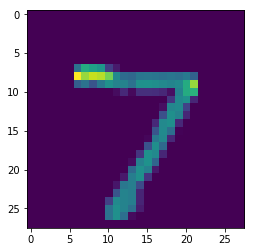

In [25]:
plt.imshow(x_test[0])
plt.show()